Load the Dataset (or you can load # outted the paths below and load your dataset from your computer)

In [1]:
import pandas as pd

# Paths to your CSV files
calendar_path = './data/raw/calendar.csv'
listings_path = './data/raw/listings.csv'
reviews_path = './data/raw/reviews.csv'

# Load the CSV files
calendar_df = pd.read_csv(calendar_path)
listings_df = pd.read_csv(listings_path)
reviews_df = pd.read_csv(reviews_path)

Explore the Dataset

In [2]:
# Display the first few rows of each DataFrame to understand their structure
print("Calendar DataFrame:")
print(calendar_df.head())

print("\nListings DataFrame:")
print(listings_df.head())

print("\nReviews DataFrame:")
print(reviews_df.head())

# Display summary info for each DataFrame
print("\nCalendar DataFrame Info:")
print(calendar_df.info())

print("\nListings DataFrame Info:")
print(listings_df.info())

print("\nReviews DataFrame Info:")
print(reviews_df.info())


Calendar DataFrame:
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

Listings DataFrame:
        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau  

calendar dataframe cleaning

1. price to numeric after removing the dollar sign
2. date to datetime
3. available to boolean
4. handle missing values

In [3]:
# Inspect the initial values in the 'available' column
print("Initial unique values in 'available':", calendar_df['available'].unique())

# Convert available to boolean if values are 't' and 'f'
calendar_df['available'] = calendar_df['available'].map({'t': True, 'f': False})

# Check the unique values in 'available' after mapping
print("Unique values in 'available' after mapping:", calendar_df['available'].unique())

# Remove dollar sign and convert price to numeric
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert date to datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# Handle missing values by dropping rows where price or available is NaN
calendar_df.dropna(subset=['price', 'available'], inplace=True)

# Display cleaned Calendar DataFrame
print(calendar_df.head())
print(calendar_df.info())


Initial unique values in 'available': ['t' 'f']
Unique values in 'available' after mapping: [ True False]
    listing_id       date  available  price
0       241032 2016-01-04       True   85.0
1       241032 2016-01-05       True   85.0
9       241032 2016-01-13       True   85.0
10      241032 2016-01-14       True   85.0
14      241032 2016-01-18       True   85.0
<class 'pandas.core.frame.DataFrame'>
Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  bool          
 3   price       934542 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 29.4 MB
None


Listings dataframe cleaning

Remove Unwanted Columns

In [4]:
# List of columns to remove
columns_to_remove = [
    'scrape_id', 'last_scraped', 'space', 'experiences_offered', 'thumbnail_url',
    'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_location', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'neighbourhood', 'calendar_updated',
    'calendar_last_scraped', 'requires_license', 'license', 'availability_30',
    'availability_60', 'availability_90', 'availability_365'
]

# Remove the specified columns
listings_df.drop(columns=columns_to_remove, inplace=True)

# Display the updated Listings DataFrame
print(listings_df.head())
print(listings_df.info())



        id                           listing_url  \
0   241032   https://www.airbnb.com/rooms/241032   
1   953595   https://www.airbnb.com/rooms/953595   
2  3308979  https://www.airbnb.com/rooms/3308979   
3  7421966  https://www.airbnb.com/rooms/7421966   
4   278830   https://www.airbnb.com/rooms/278830   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                         description  \
0  Make your self at home in this charmin

Price-Related Columns to Numeric and Handle Missing Values

filling missing values in specific text columns with empty strings. Any missing values in these columns are replaced with an empty string rather than leaving them as NaN (Not a Number), which can cause issues in data processing and analysis.

In [5]:
# Remove dollar signs and convert price-related columns to numeric
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    listings_df[col] = listings_df[col].replace('[\$,]', '', regex=True).astype(float)

# Convert date columns to datetime
date_columns = ['host_since', 'first_review', 'last_review']
for col in date_columns:
    listings_df[col] = pd.to_datetime(listings_df[col])

# Fill missing values with empty strings for text columns
text_columns = ['summary', 'neighborhood_overview', 'notes', 'transit']
listings_df[text_columns] = listings_df[text_columns].fillna('')

# Display the cleaned Listings DataFrame
print(listings_df.head())
print(listings_df.info())


        id                           listing_url  \
0   241032   https://www.airbnb.com/rooms/241032   
1   953595   https://www.airbnb.com/rooms/953595   
2  3308979  https://www.airbnb.com/rooms/3308979   
3  7421966  https://www.airbnb.com/rooms/7421966   
4   278830   https://www.airbnb.com/rooms/278830   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                      
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                         description  \
0  Make your self at home in this charmin

Feature Engineering for Pricing Strategy

In [6]:
# Create new features
listings_df['price_per_bedroom'] = listings_df['price'] / listings_df['bedrooms']
listings_df['price_per_guest'] = listings_df['price'] / listings_df['accommodates']

# Display the updated Listings DataFrame with new features
print(listings_df.head())


        id                           listing_url  \
0   241032   https://www.airbnb.com/rooms/241032   
1   953595   https://www.airbnb.com/rooms/953595   
2  3308979  https://www.airbnb.com/rooms/3308979   
3  7421966  https://www.airbnb.com/rooms/7421966   
4   278830   https://www.airbnb.com/rooms/278830   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                      
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                         description  \
0  Make your self at home in this charmin

Final Checks

In [7]:
# Final check for any remaining missing values
missing_values = listings_df.isnull().sum()
print(missing_values[missing_values > 0])

# Display the final cleaned Listings DataFrame
print(listings_df.head())
print(listings_df.info())

# Save the cleaned Listings DataFrame
listings_df.to_csv('./data/processed/cleaned_listings.csv', index=False)




host_name                         2
host_since                        2
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3721
weekly_price                   1809
monthly_price                  2301
security_deposit               1952
cleaning_fee                   1030
first_review                    627
last_review                     627
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin       

Reviews dataframe cleaning

date to Datetime format

In [8]:
# Convert date to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Display the updated Reviews DataFrame to verify changes
print(reviews_df[['date']].head())


        date
0 2015-07-19
1 2015-07-20
2 2015-07-26
3 2015-08-02
4 2015-08-10


Handle Missing Values


We will fill missing values in the comments column with empty strings. This ensures consistency and prevents issues during text analysis.

In [9]:
# Handle missing values in comments by filling with empty strings
reviews_df['comments'].fillna('', inplace=True)

# Display the cleaned Reviews DataFrame
print(reviews_df.head())
print(reviews_df.info())


   listing_id        id       date  reviewer_id reviewer_name  \
0     7202016  38917982 2015-07-19     28943674        Bianca   
1     7202016  39087409 2015-07-20     32440555         Frank   
2     7202016  39820030 2015-07-26     37722850           Ian   
3     7202016  40813543 2015-08-02     33671805        George   
4     7202016  41986501 2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id           

Final Checks for Missing Values

In [10]:
# Final check for any remaining missing values
missing_values = reviews_df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


Save the Cleaned Reviews DataFrame

In [11]:
# Save the cleaned Reviews DataFrame
cleaned_reviews_path = './data/processed/cleaned_reviews.csv'
reviews_df.to_csv(cleaned_reviews_path, index=False)

# Display the final cleaned Reviews DataFrame
print(reviews_df.head())
print(reviews_df.info())


   listing_id        id       date  reviewer_id reviewer_name  \
0     7202016  38917982 2015-07-19     28943674        Bianca   
1     7202016  39087409 2015-07-20     32440555         Frank   
2     7202016  39820030 2015-07-26     37722850           Ian   
3     7202016  40813543 2015-08-02     33671805        George   
4     7202016  41986501 2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84849 non-null  int64         
 1   id           

EDA

Import libraries and load cleaned dataframes

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_calendar_path = './data/processed/cleaned_calendar.csv'
cleaned_listings_path = './data/processed/cleaned_listings.csv'
cleaned_reviews_path = './data/processed/cleaned_reviews.csv'


calendar_df = pd.read_csv(cleaned_calendar_path)
listings_df = pd.read_csv(cleaned_listings_path)
reviews_df = pd.read_csv(cleaned_reviews_path)


Distribution of Prices

C:\Users\artso\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


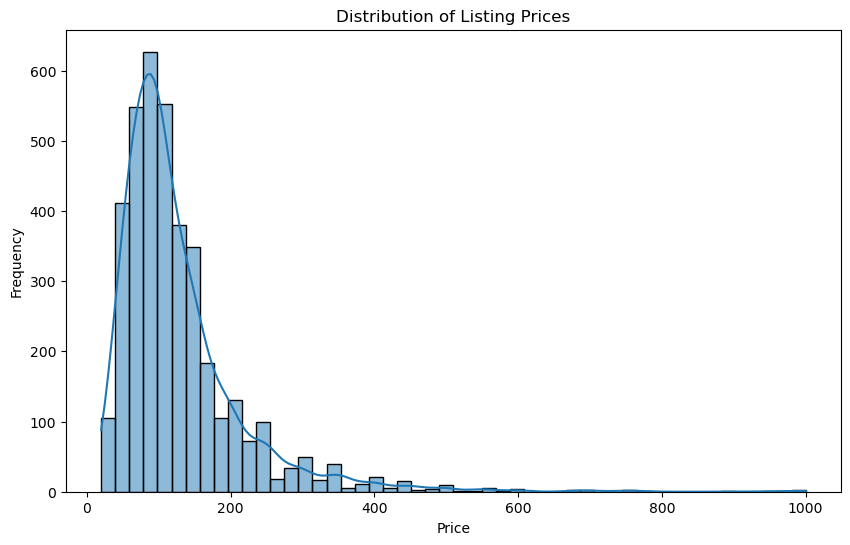

In [13]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['price'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Calculate and Visualize Average Prices by Neighborhood Group

neighbourhood_group_cleansed
Ballard                124.682609
Beacon Hill             94.669492
Capitol Hill           130.592593
Cascade                140.101124
Central Area           128.338753
Delridge                83.278481
Downtown               154.405660
Interbay               109.727273
Lake City               92.671642
Magnolia               177.672131
Northgate               88.550000
Other neighborhoods    119.968514
Queen Anne             157.223729
Rainier Valley          91.899371
Seward Park            108.477273
University District     93.639344
West Seattle           141.359606
Name: price, dtype: float64


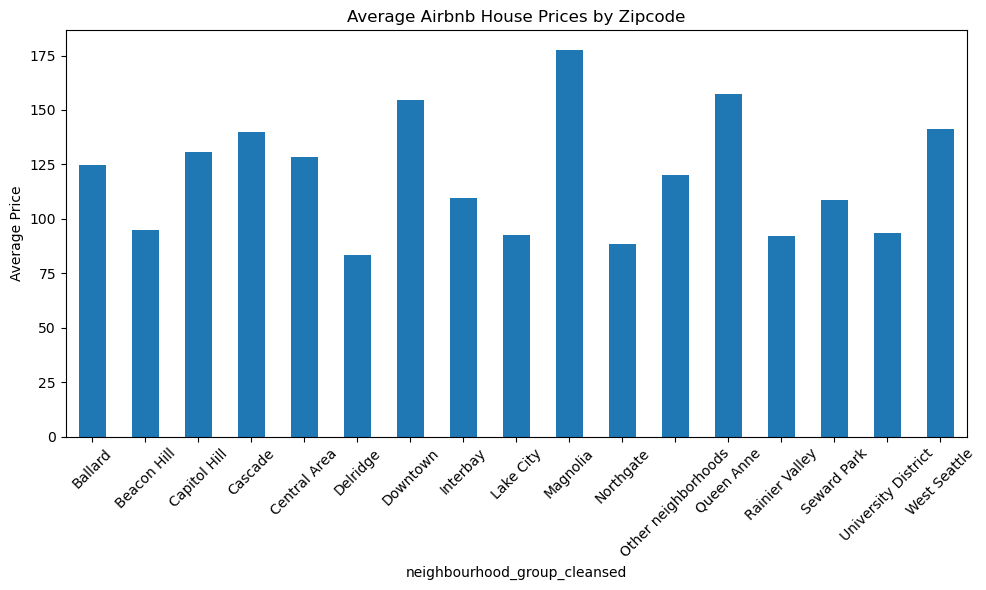

In [14]:
# Group by neighborhood group and calculate the average price
average_prices = listings_df.groupby('neighbourhood_group_cleansed')['price'].mean()

# Print the average prices
print(average_prices)

# Plotting
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar')
plt.title('Average Airbnb House Prices by Zipcode')
plt.xlabel('neighbourhood_group_cleansed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Clean Up Data for Regression Analysis

In [15]:
# Convert 'zipcode' column to numeric, ignoring errors
listings_df['zipcode'] = pd.to_numeric(listings_df['zipcode'], errors='coerce')

# Convert 'bedrooms' column to numeric, ignoring errors
listings_df['bedrooms'] = pd.to_numeric(listings_df['bedrooms'], errors='coerce')

# Convert 'bathrooms' column to numeric, ignoring errors
listings_df['bathrooms'] = pd.to_numeric(listings_df['bathrooms'], errors='coerce')

# Drop rows with missing values
listings_df.dropna(inplace=True)

# Check the data types of all columns
print(listings_df.dtypes)

id                                    int64
listing_url                          object
name                                 object
summary                              object
description                          object
                                     ...   
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
price_per_bedroom                   float64
price_per_guest                     float64
Length: 72, dtype: object


Predict House Listing Prices in Different Areas of Seattle

In [16]:
# Write a program to predict what a house listing price should be in different areas of Seattle.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant features (bedrooms, bathrooms, and zipcode) and target variable (price)
X = listings_df[['bedrooms', 'bathrooms', 'zipcode']]
y = listings_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Function to predict price based on input features
def predict_price(bedrooms, bathrooms, zipcode):
    input_data = pd.DataFrame([[bedrooms, bathrooms, zipcode]], columns=['bedrooms', 'bathrooms', 'zipcode'])
    price = model.predict(input_data)
    return price[0]

#Collect input from user
bedrooms = float(input("Enter the number of bedrooms in the listing: "))
bathrooms = float(input("Enter the number of bathrooms in the listing: "))
zipcode = float(input("Enter the zipcode of the listing: "))
predicted_price = predict_price(bedrooms, bathrooms, zipcode)
print("Predicted price:", predicted_price)

Mean Squared Error: 227.99758316553923


Enter the number of bedrooms in the listing:  3
Enter the number of bathrooms in the listing:  2
Enter the zipcode of the listing:  98102


Predicted price: 178.60040694840427


KeyWord Search for Amenities at Listings

In [17]:
# Function to perform keyword search on amenities
def search_listings(keyword):
    # Filter the DataFrame to include only listings containing the keyword in amenities
    filtered_data = listings_df[listings_df['amenities'].str.contains(keyword, case=False)]

    # Check if any listings match the keyword
    if not filtered_data.empty:
        # Display relevant details of the matching listings
        print("Listings containing the keyword '{}':".format(keyword))
        for index, row in filtered_data.iterrows():
            print("\nListing ID:", row['id'])
            print("Name:", row['name'])
            print("Host Response Time:", row['host_response_time'])
            print("Bedrooms:", row['bedrooms'])
            print("Bathrooms:", row['bathrooms'])
            print("Beds:", row['beds'])
            print("Price:", row['price'])
            print("Neighbourhood Cleansed:", row['neighbourhood_cleansed'])
            print("Minimum Nights:", row['minimum_nights'])
            print("Guests Included:", row['guests_included'])
            print("Number of Reviews:", row['number_of_reviews'])
            print("Review Scores Rating:", row['review_scores_rating'])
            print("Listing Link:", row['listing_url'])
            print("-" * 50)
    else:
        print("No listings found containing the keyword '{}'.".format(keyword))

# Main function
def main():
    # Prompt the user to enter a keyword for amenity search
    keyword = input("Enter a keyword to search for listings: ")

    # Perform keyword search on amenities
    search_listings(keyword)

# Entry point of the program
if __name__ == "__main__":
    main()

Enter a keyword to search for listings:  family


Listings containing the keyword 'family':

Listing ID: 227636
Name: Large Ballard/Fremont apartment
Host Response Time: within an hour
Bedrooms: 1.0
Bathrooms: 1.0
Beds: 2.0
Price: 120.0
Neighbourhood Cleansed: West Woodland
Minimum Nights: 2
Guests Included: 2
Number of Reviews: 131
Review Scores Rating: 97.0
Listing Link: https://www.airbnb.com/rooms/227636
--------------------------------------------------

Listing ID: 566435
Name: "THE 5-STAR HOUSE" 
Host Response Time: within an hour
Bedrooms: 1.0
Bathrooms: 3.5
Beds: 1.0
Price: 65.0
Neighbourhood Cleansed: Crown Hill
Minimum Nights: 2
Guests Included: 2
Number of Reviews: 37
Review Scores Rating: 95.0
Listing Link: https://www.airbnb.com/rooms/566435
--------------------------------------------------

Listing ID: 2197982
Name: Private Studio in Seattle
Host Response Time: within an hour
Bedrooms: 0.0
Bathrooms: 1.0
Beds: 1.0
Price: 80.0
Neighbourhood Cleansed: Maple Leaf
Minimum Nights: 2
Guests Included: 2
Number of Reviews: 72


Correlation Analysis between Host Response Rate and Review Type Categories

                           host_response_rate  number_of_reviews  \
host_response_rate                   1.000000           0.119297   
number_of_reviews                    0.119297           1.000000   
host_total_listings_count            0.208514          -0.349955   
review_scores_rating                -0.072232           0.061283   
reviews_per_month                   -0.167442           0.725246   

                           host_total_listings_count  review_scores_rating  \
host_response_rate                          0.208514             -0.072232   
number_of_reviews                          -0.349955              0.061283   
host_total_listings_count                   1.000000             -0.070286   
review_scores_rating                       -0.070286              1.000000   
reviews_per_month                          -0.672774             -0.056488   

                           reviews_per_month  
host_response_rate                 -0.167442  
number_of_reviews           

C:\Users\artso\AppData\Local\Temp\ipykernel_6496\822209781.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['host_response_rate'] = selected_data['host_response_rate'].str.rstrip('%').astype('float')
C:\Users\artso\AppData\Local\Temp\ipykernel_6496\822209781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.dropna(inplace=True)


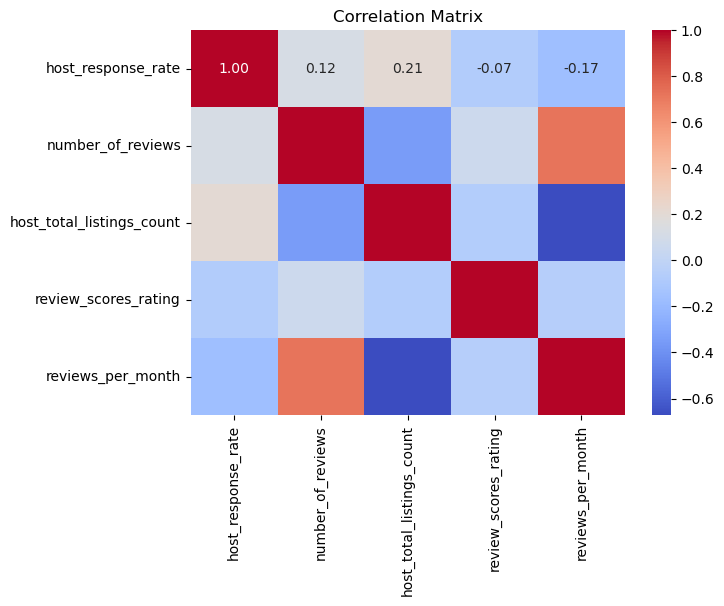

In [18]:
#Correlation Matrix between host response rate and review type categories
# Select relevant columns
selected_data = listings_df[['host_response_rate', 'number_of_reviews', 'host_total_listings_count','review_scores_rating','reviews_per_month']]

# Convert 'host_response_rate' to numeric (remove '%' sign)
selected_data['host_response_rate'] = selected_data['host_response_rate'].str.rstrip('%').astype('float')

# Drop rows with missing values
selected_data.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Print correlation matrix
print(correlation_matrix)

# Plot correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Import Necessary Libraries for Modeling and Visualization

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


# Convert 'zipcode' column to numeric, ignoring errors
listings_df['zipcode'] = pd.to_numeric(listings_df['zipcode'], errors='coerce')

# Convert 'bedrooms' column to numeric, ignoring errors
listings_df['bedrooms'] = pd.to_numeric(listings_df['bedrooms'], errors='coerce')

# Convert 'bathrooms' column to numeric, ignoring errors
listings_df['bathrooms'] = pd.to_numeric(listings_df['bathrooms'], errors='coerce')



Top 10 Airbnb Listings by Review Rating

In [20]:

sorted_listings_df = listings_df.sort_values(by=['review_scores_rating'],ascending=False).head(10)
sorted_listings_df[['id','name','summary','neighbourhood_cleansed','room_type','zipcode','accommodates','bathrooms','bedrooms','beds','price','review_scores_rating']]

,id,name,summary,neighbourhood_cleansed,room_type,zipcode,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
1187,685600,Steps from magical Discovery Park-1,A truly magnificent location in the heart of S...,Lawton Park,Private room,98199.0,2,1.0,1.0,1.0,75.0,100.0
1851,9531,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,Fairmount Park,Entire home/apt,98136.0,4,1.0,2.0,5.0,165.0,100.0
2436,2197982,Private Studio in Seattle,Cozy private studio apartment. Maple Leaf neig...,Maple Leaf,Entire home/apt,98115.0,2,1.0,0.0,1.0,80.0,98.0
163,227636,Large Ballard/Fremont apartment,The apartment is located in a friendly neighbo...,West Woodland,Entire home/apt,98107.0,3,1.0,1.0,2.0,120.0,97.0
234,1167507,Queen Anne Mother-In-Law 1br/1bath,Queen Anne is a wonderful community close to d...,East Queen Anne,Entire home/apt,98109.0,4,1.0,1.0,2.0,110.0,97.0
3228,363064,A min away from Space Needle,"Hi, this is newly renovated studio, only a cou...",Lower Queen Anne,Entire home/apt,98109.0,3,1.0,0.0,2.0,90.0,97.0
2228,1223644,Cozy Apt in Historic Columbia City,"Private, light filled daylight basement apartm...",Columbia City,Entire home/apt,98118.0,3,1.0,1.0,1.0,90.0,96.0
2303,1097520,Relaxed sophistication in Mt. Baker,You will love the beautifully remodeled studio...,Mount Baker,Entire home/apt,98118.0,2,1.5,1.0,1.0,92.0,96.0
1836,566435,"""THE 5-STAR HOUSE""","THE 5-STAR HOUSE, IS GIVING YOU A SPECIAL PRIC...",Crown Hill,Private room,98117.0,2,3.5,1.0,1.0,65.0,95.0
3483,226677,Classic beauty room w/warm heat,This classic beauty is decorated in simple bla...,Georgetown,Private room,98108.0,2,3.0,1.0,1.0,70.0,93.0


Data Cleaning for Analyzing Impact of Reviews on Price

In [21]:
# How do the number of reviews and review scores impact the price of a listing?


# Data cleaning
review = listings_df[['id','name','summary','neighbourhood_cleansed','zipcode','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','review_scores_rating','number_of_reviews']]

review = review.fillna(0) # replacing all NaN to -1

review

,id,name,summary,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,number_of_reviews
163,227636,Large Ballard/Fremont apartment,The apartment is located in a friendly neighbo...,West Woodland,98107.0,Apartment,Entire home/apt,3,1.0,1.0,2.0,120.0,97.0,131
234,1167507,Queen Anne Mother-In-Law 1br/1bath,Queen Anne is a wonderful community close to d...,East Queen Anne,98109.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,110.0,97.0,61
1187,685600,Steps from magical Discovery Park-1,A truly magnificent location in the heart of S...,Lawton Park,98199.0,House,Private room,2,1.0,1.0,1.0,75.0,100.0,8
1836,566435,"""THE 5-STAR HOUSE""","THE 5-STAR HOUSE, IS GIVING YOU A SPECIAL PRIC...",Crown Hill,98117.0,House,Private room,2,3.5,1.0,1.0,65.0,95.0,37
1851,9531,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,Fairmount Park,98136.0,House,Entire home/apt,4,1.0,2.0,5.0,165.0,100.0,26
2228,1223644,Cozy Apt in Historic Columbia City,"Private, light filled daylight basement apartm...",Columbia City,98118.0,Apartment,Entire home/apt,3,1.0,1.0,1.0,90.0,96.0,38
2303,1097520,Relaxed sophistication in Mt. Baker,You will love the beautifully remodeled studio...,Mount Baker,98118.0,Apartment,Entire home/apt,2,1.5,1.0,1.0,92.0,96.0,90
2436,2197982,Private Studio in Seattle,Cozy private studio apartment. Maple Leaf neig...,Maple Leaf,98115.0,Apartment,Entire home/apt,2,1.0,0.0,1.0,80.0,98.0,72
3228,363064,A min away from Space Needle,"Hi, this is newly renovated studio, only a cou...",Lower Queen Anne,98109.0,Apartment,Entire home/apt,3,1.0,0.0,2.0,90.0,97.0,37
3483,226677,Classic beauty room w/warm heat,This classic beauty is decorated in simple bla...,Georgetown,98108.0,Other,Private room,2,3.0,1.0,1.0,70.0,93.0,48


Split Dataset into Features and Target

In [22]:
#split dataset in features and target variable
feature_cols = ['review_scores_rating','number_of_reviews']

x = review[feature_cols] # Features
y = review.price # Target variable

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

Train Random Forest Regressor and Evaluate Accuracy

In [23]:
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
# Print results
print(mse)
print(rmse)
r2 = r2_score(y_test, prediction, force_finite=False)
print(r2)

2286.239033333333
47.814632000396415
-0.34114847051634567


Predict the future prices of listings based on historical data and identified trends

In [24]:
#split dataset in features and target variable
feature_cols = ['zipcode','accommodates','bathrooms','bedrooms','beds']

x = review[feature_cols] # Features
y = review.price # Target variable

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

 Train and Evaluate Random Forest Regressor

In [25]:
# Create and train model
rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 10, random_state = 20)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
# Print results
print(mse)
print(rmse)
r2 = r2_score(y_test, prediction, force_finite=False)
print(r2)

1025.7919759999997
32.02798738603473
0.39825218639780036
